In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_set = train_datagen.flow_from_directory(directory='./../../Data/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set/',
                                              batch_size=32, class_mode='binary', target_size=(64, 64))

test_set = test_datagen.flow_from_directory(directory='./../../Data/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set/',
                                           batch_size=32, class_mode='binary', target_size=(64, 64), shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
model = Sequential()

model.add(Input(shape=(64, 64, 3)))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
model.fit(x=train_set, validation_data=test_set, epochs=50, callbacks=[early_stop])

Epoch 1/50


C:\Users\prith\PycharmProjects\data_science\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - loss: 0.7067 - val_loss: 0.6922
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 0.6887 - val_loss: 0.6536
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.6593 - val_loss: 0.6175
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - loss: 0.6312 - val_loss: 0.6222
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.6059 - val_loss: 0.5772
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.5919 - val_loss: 0.5740
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.5819 - val_loss: 0.5776
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.5658 - val_loss: 0.5382
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.5663 - val_loss: 0.5497
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 0.5478 - val_loss: 0.5406
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - loss: 0.5549 - val_loss: 0.5255
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
loss = pd.DataFrame(model.history.history)

<Axes: >

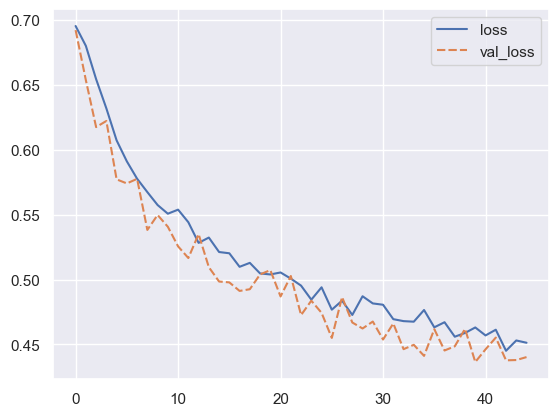

In [8]:
sns.lineplot(loss)

In [9]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
y_true = test_set.classes
y_pred = model.predict(test_set)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [12]:
print(confusion_matrix(y_true, y_pred))

[[804 196]
 [203 797]]


In [13]:
print(classification_report(y_true, y_pred, target_names=test_set.class_indices.keys()))

              precision    recall  f1-score   support

        cats       0.80      0.80      0.80      1000
        dogs       0.80      0.80      0.80      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [14]:
from tensorflow.keras.preprocessing import image

In [20]:
test_image = image.load_img('./../../Data/Part 2 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
cat
